In [2]:
####Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import custom_object_scope
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report , confusion_matrix




C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#### Download dataset and print it to see train and test quantity true or not
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")

Shape of X_train:(50000, 32, 32, 3)
Shape of y_train:(50000, 1)
Shape of X_test:(10000, 32, 32, 3)
Shape of y_train:(50000, 1)


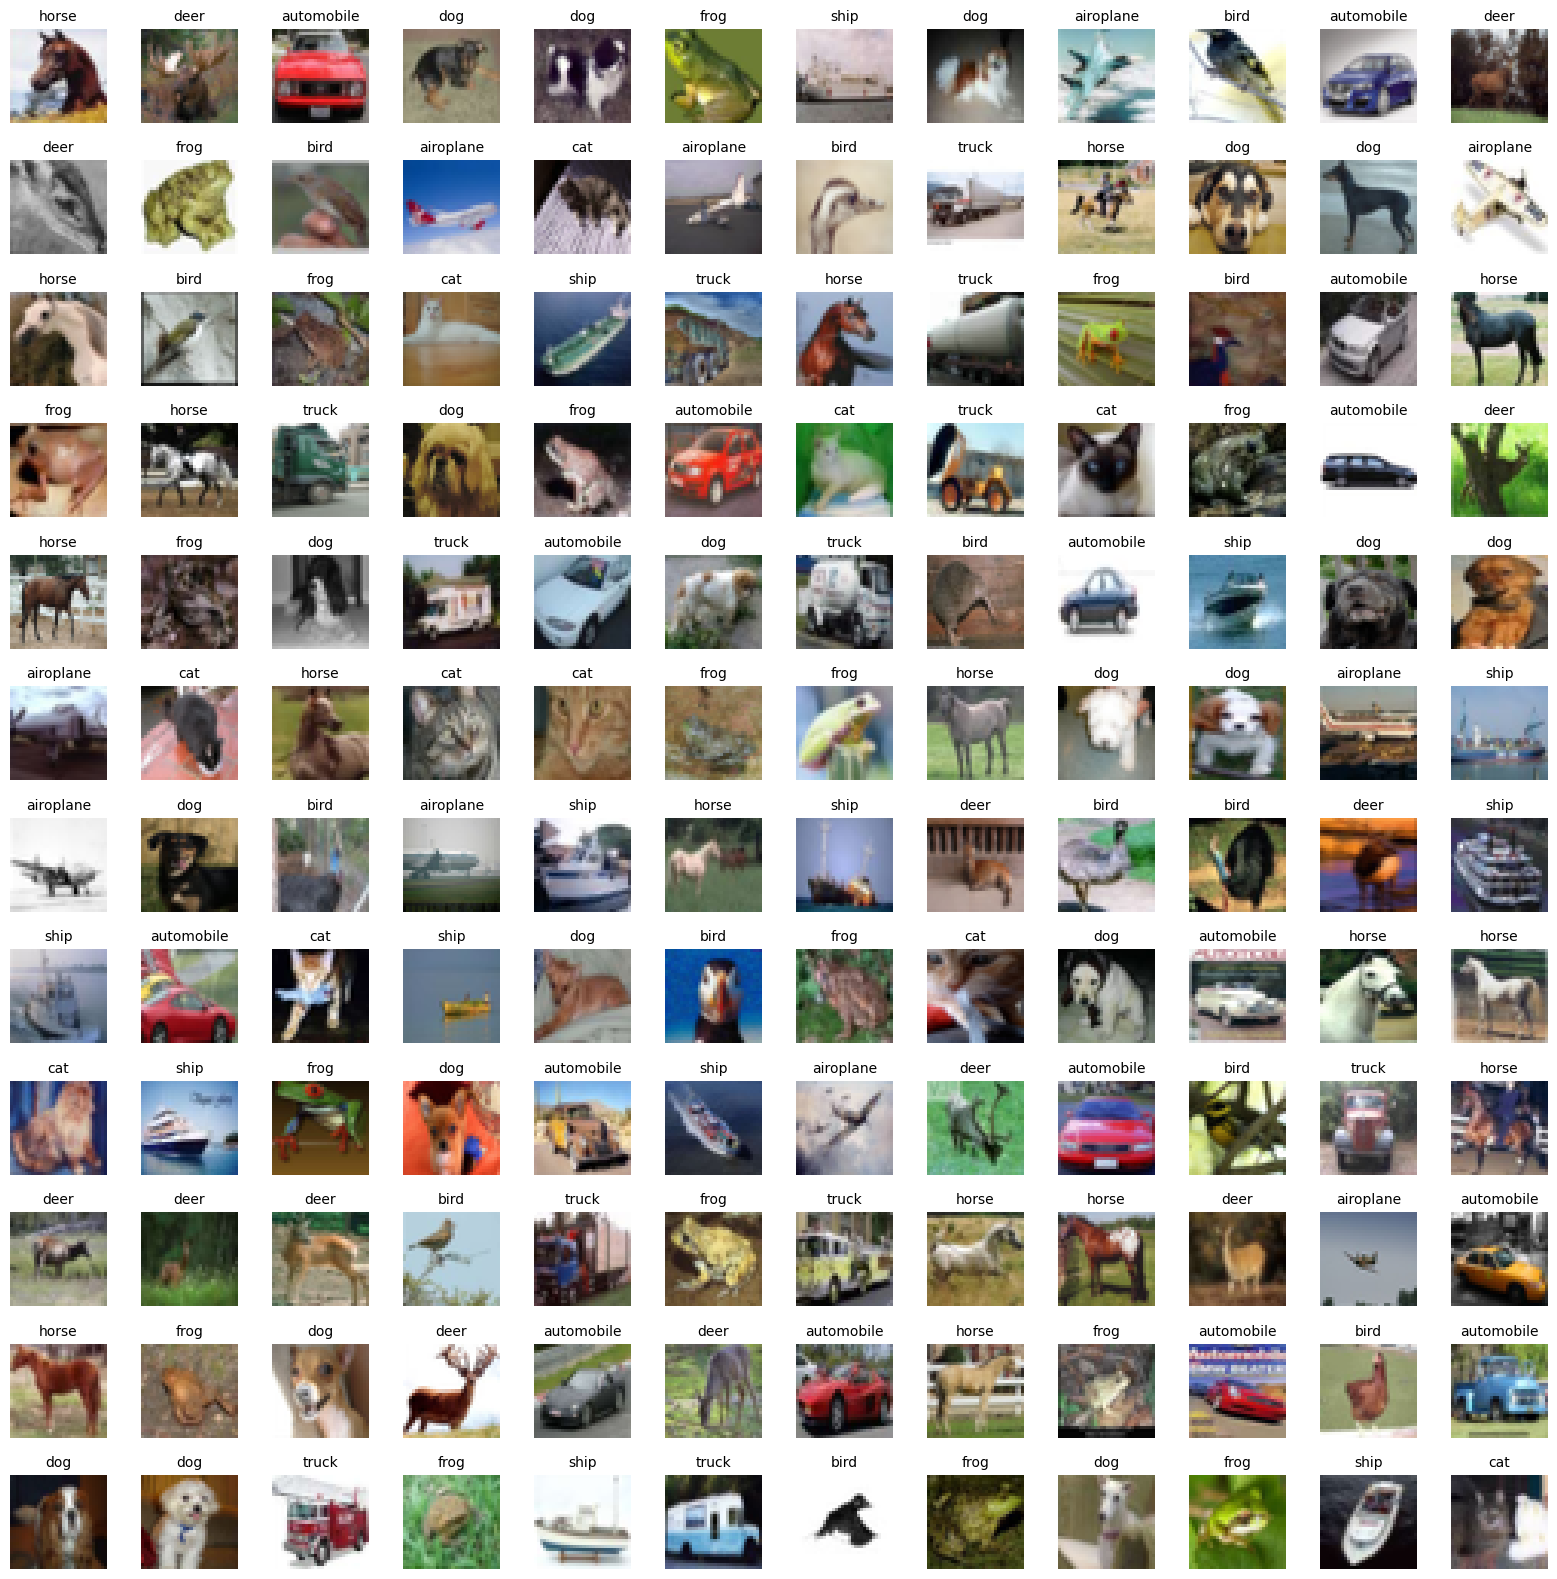

In [4]:
### Data visualization and see several images in grid table 12x12

columns=["airoplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
v_grid=12
h_grid=12
fig,axes = plt.subplots(v_grid,h_grid,figsize=(20,20))
axes=axes.ravel()
n_train=len(X_train)
for i in np.arange(0,h_grid*v_grid):
    index=np.random.randint(0,n_train)
    axes[i].imshow(X_train[index,1:])
    label_index=int(y_train[index])
    axes[i].set_title(columns[label_index],fontsize=10)
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)


Text(0.5, 1.0, 'Distribution of train set')

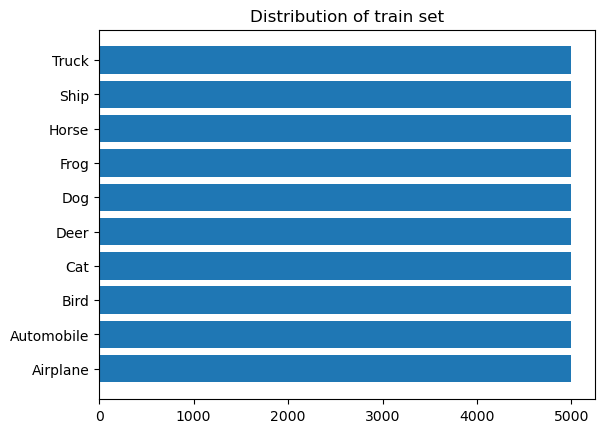

In [5]:
Class_name=["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
classes,counts=np.unique(y_train,return_counts=True)
plt.barh(Class_name,counts)
plt.title("Distribution of train set")

Text(0.5, 1.0, 'Distribution of test set')

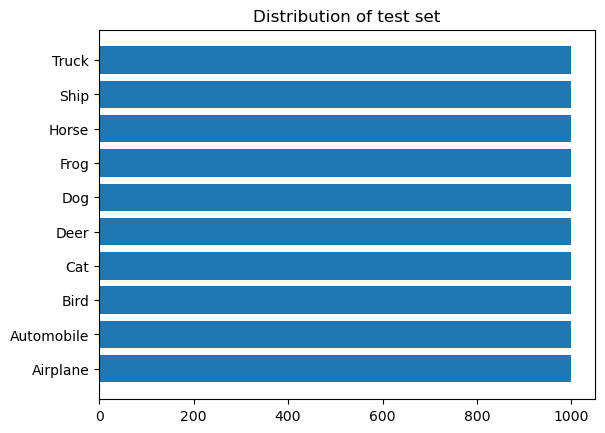

In [6]:
Class_name=["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
classes,counts =np.unique(y_test,return_counts=True)
plt.barh(Class_name,counts)
plt.title("Distribution of test set")

In [7]:
## Scaling dataset 
X_train=X_train/255
X_test=X_test/255
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)
print(y_cat_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [8]:
### Model building
Input_Shape=(32,32,3)
Kernel_size=(3,3)
model=Sequential()

##CNN layer
model.add(Conv2D(filters=32 ,kernel_size=Kernel_size,input_shape=Input_Shape,activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=Kernel_size,input_shape=Input_Shape,activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64 ,kernel_size=Kernel_size,input_shape=Input_Shape,activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=Kernel_size,input_shape=Input_Shape,activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128 ,kernel_size=Kernel_size,input_shape=Input_Shape,activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=Kernel_size,input_shape=Input_Shape,activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
        

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
y_cat_train = np.argmax(y_cat_train, axis=1)
y_cat_test = np.argmax(y_cat_test, axis=1)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
          


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [10]:
early_stop=EarlyStopping(monitor="val_loss",patience=2)

In [11]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(X_test, y_cat_test),steps_per_epoch=steps_per_epoch, epochs=20)

Epoch 1/20
1562/1562 [==============================] - 210s 130ms/step - loss: 1.6503 - accuracy: 0.4036 - val_loss: 1.2741 - val_accuracy: 0.5383
Epoch 2/20
1562/1562 [==============================] - 203s 130ms/step - loss: 1.2318 - accuracy: 0.5612 - val_loss: 1.2523 - val_accuracy: 0.5817
Epoch 3/20
1562/1562 [==============================] - 202s 130ms/step - loss: 1.0547 - accuracy: 0.6271 - val_loss: 0.9231 - val_accuracy: 0.6771
Epoch 4/20
1562/1562 [==============================] - 204s 131ms/step - loss: 0.9458 - accuracy: 0.6705 - val_loss: 1.0041 - val_accuracy: 0.6524
Epoch 5/20
1562/1562 [==============================] - 197s 126ms/step - loss: 0.8864 - accuracy: 0.6913 - val_loss: 0.7416 - val_accuracy: 0.7400
Epoch 6/20
1562/1562 [==============================] - 201s 129ms/step - loss: 0.8305 - accuracy: 0.7124 - val_loss: 0.8460 - val_accuracy: 0.7038
Epoch 7/20
1562/1562 [==============================] - 202s 129ms/step - loss: 0.7891 - accuracy: 0.7283 - val_

<function matplotlib.pyplot.legend(*args, **kwargs)>

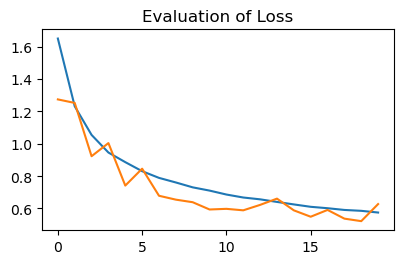

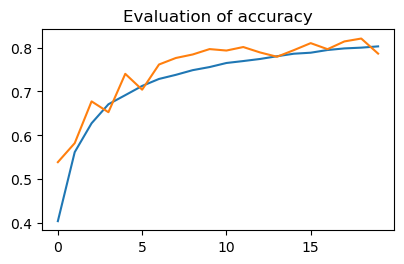

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
plt.subplot(4,2,1)
plt.plot(r.history["loss"],label="Loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.title("Evaluation of Loss")
plt.legend

plt.figure(figsize=(10,12))
plt.subplot(4,2,2)
plt.plot(r.history["accuracy"],label="Accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.title("Evaluation of accuracy")
plt.legend

313/313 [==============================] - 13s 42ms/step - loss: 0.6273 - accuracy: 0.7862
Test Accuracy : 78.62%
313/313 [==============================] - 12s 40ms/step


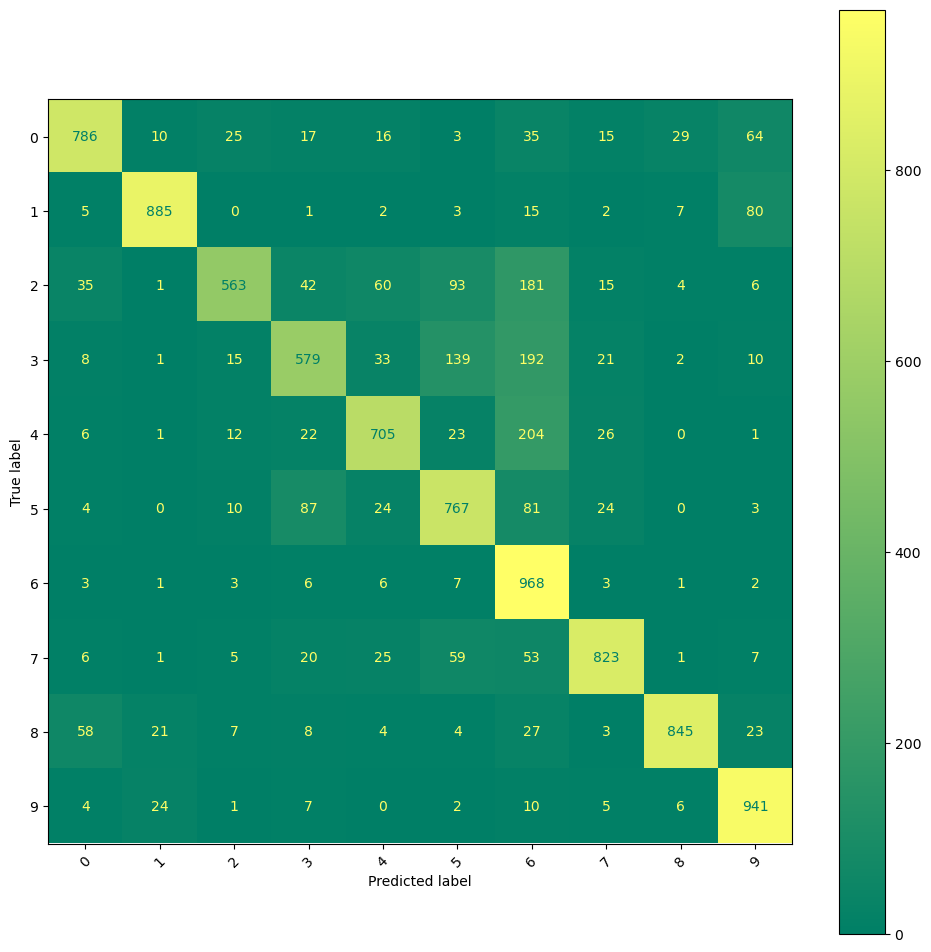

In [21]:
evaluation=model.evaluate(X_test,y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fid,ax=plt.subplots(figsize=(12,12))
xticks_rotation = 45

# Plot the confusion matrix with the specified rotation
disp.plot(xticks_rotation=xticks_rotation, ax=ax, cmap='summer')
plt.show()

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1000
           1       0.94      0.89      0.91      1000
           2       0.88      0.56      0.69      1000
           3       0.73      0.58      0.65      1000
           4       0.81      0.70      0.75      1000
           5       0.70      0.77      0.73      1000
           6       0.55      0.97      0.70      1000
           7       0.88      0.82      0.85      1000
           8       0.94      0.84      0.89      1000
           9       0.83      0.94      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000



Image 100 is :[4]
1/1 [==============================] - 0s 109ms/step
Image of 100 is 8


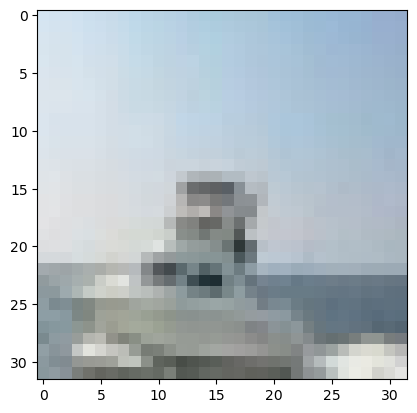

In [25]:
my_image=X_train[100]
plt.imshow(my_image)

print(f"Image 100 is :{y_test[100]}")

I_pred=np.argmax(model.predict(my_image.reshape(1,32,32,3)))
print(f"Image of 100 is {I_pred}")


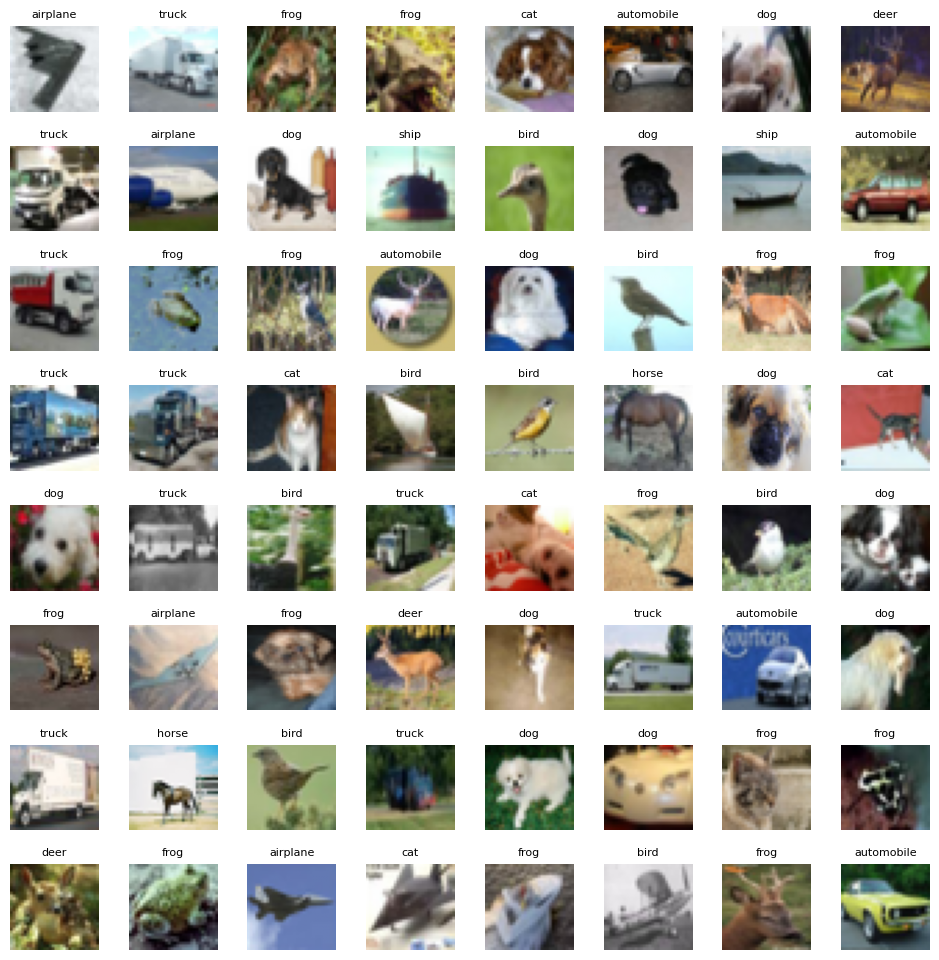

In [27]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
w_grid=8
h_grid=8

fig,axes=plt.subplots(w_grid,h_grid,figsize=(12,12))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, w_grid * h_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [28]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 13s 42ms/step


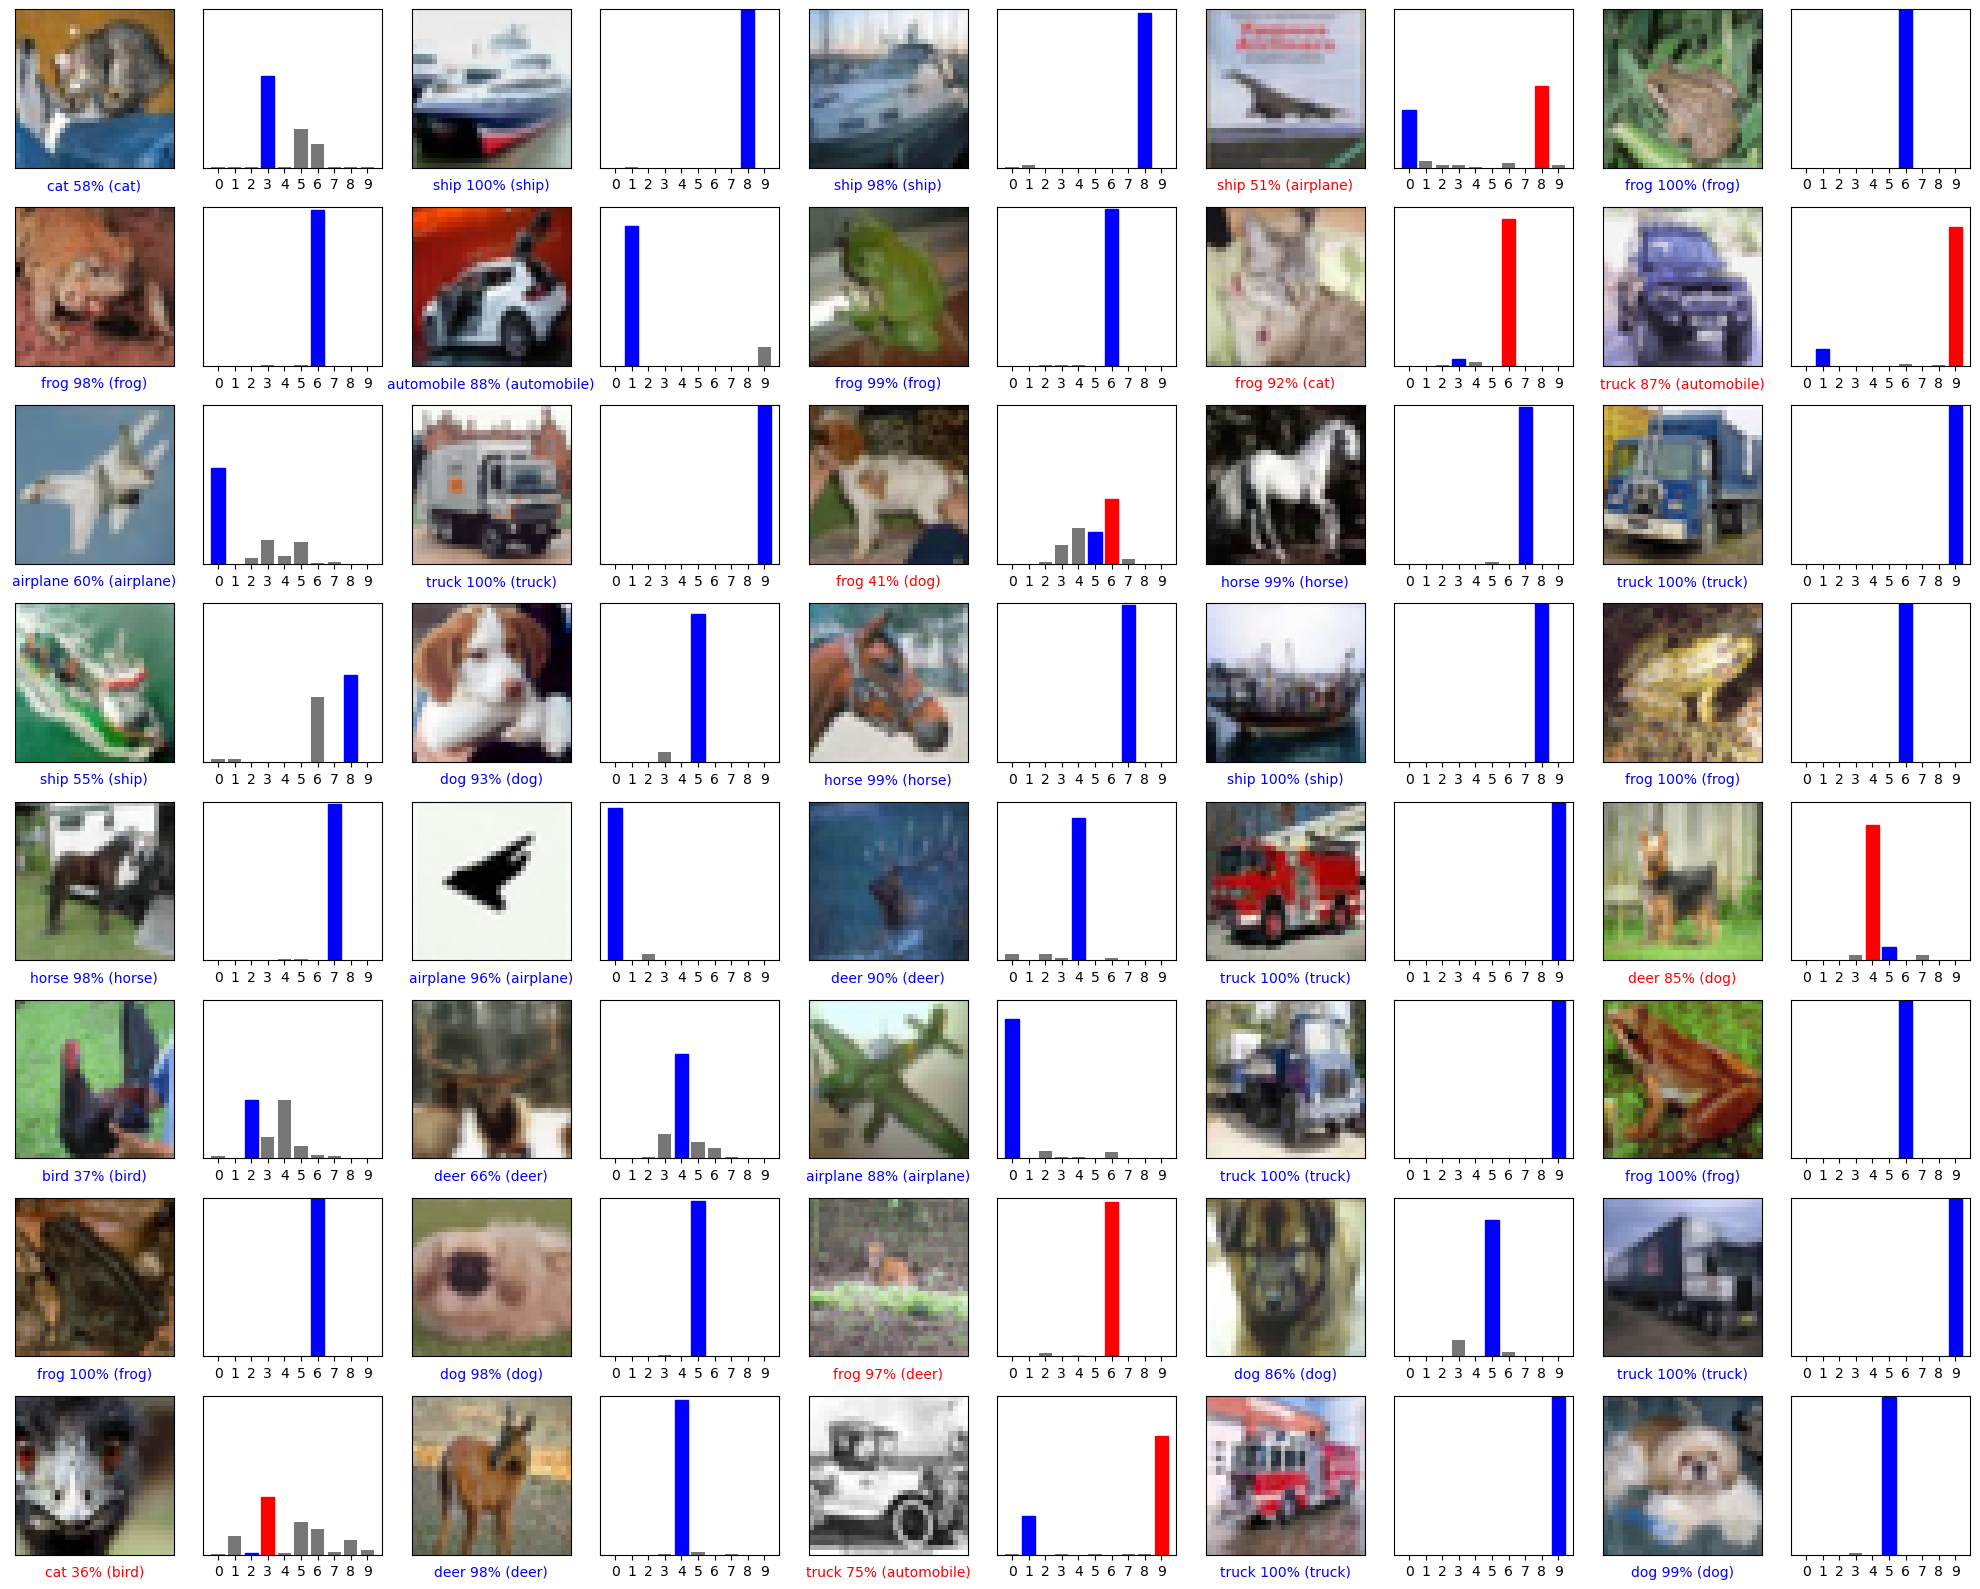

In [29]:
predictions = model.predict(X_test)
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()